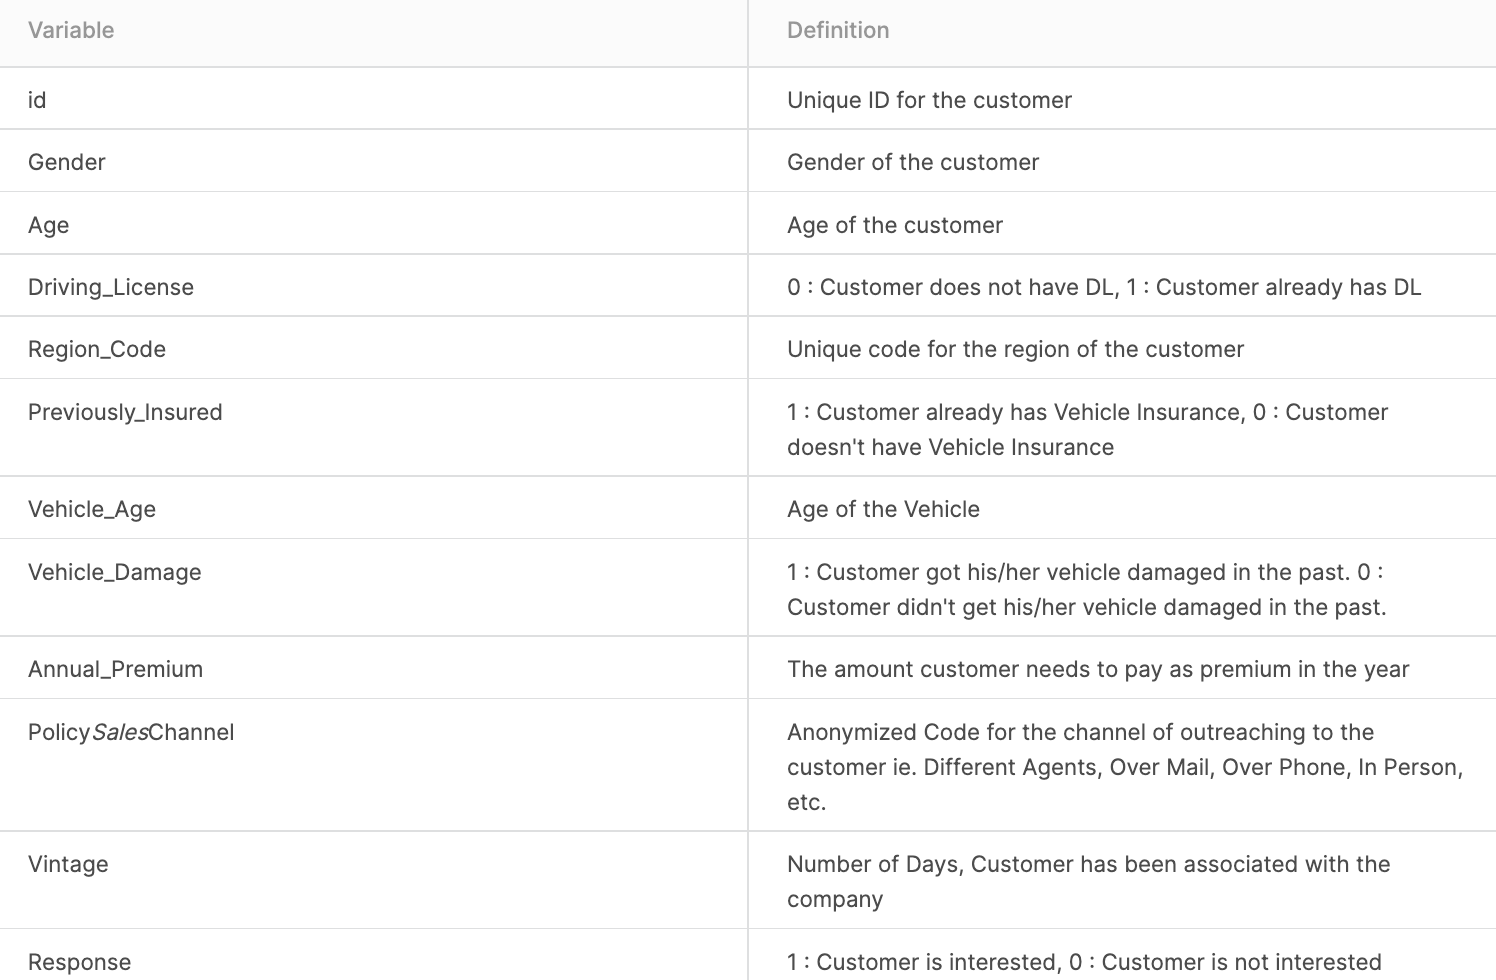

In [ ]:
!gdown --id '1m1QlTa2eetEoOdUYMQZQKDrg_L5v4cdd'

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1m1QlTa2eetEoOdUYMQZQKDrg_L5v4cdd
To: /content/train.csv
100% 21.4M/21.4M [00:00<00:00, 79.8MB/s]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('train.csv')
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.info()
#可觀察到資料無空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df['Vehicle_Age'].value_counts(sort=True)
#觀察需要轉換資料型態的欄位資料怎麼分佈->只有三種資料內容

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# df['Gender'] = labelencoder.fit_transform(df['Gender']) #男->1|女->0
# df['Vehicle_Age'] = labelencoder.fit_transform(df['Vehicle_Age']) #> 2 Years->2|1-2 Year->1|< 1 Year->0
# df['Vehicle_Damage'] = labelencoder.fit_transform(df['Vehicle_Damage']) #>Yes->1|No->0
# df = df.astype('int64')
# df
# #將字串型態欄位轉為bool值表現

### Notice：

*   bool-> Gender & Driving_License & Previously_Insured & Vehicle_Damage
*   category-> Region Code & Policy_Sales_channel & Vehicle_Age
*   int-> Age & Annual_Premium

# Visualization

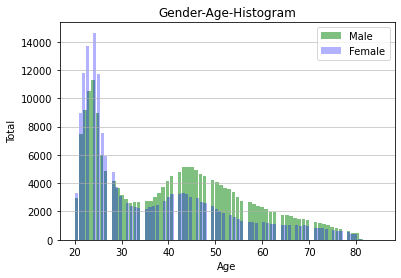

In [ ]:
# Gender-Age-Histogram
plt.style.use('seaborn-deep')
n, bins, patches = plt.hist(x=df[df['Gender']=='Male']['Age'], bins='auto', color='green', alpha=0.5, rwidth=0.85)
n, bins, patches = plt.hist(x=df[df['Gender']=='Female']['Age'], bins='auto', color='blue', alpha=0.3, rwidth=0.85)
plt.rcParams["figure.figsize"] = (16, 12)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Total')
plt.title('Gender-Age-Histogram')
plt.legend(["Male", "Female"], loc='upper right')

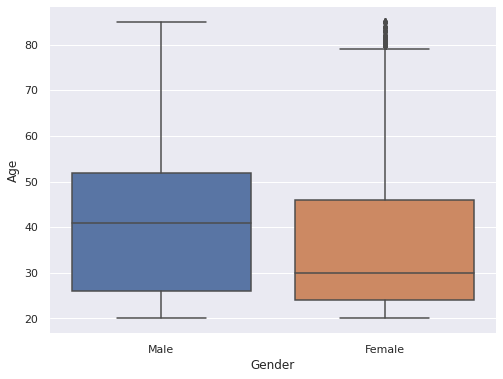

In [ ]:
# Gender-Age-boxplot
sns.set(rc={'figure.figsize':(8, 6)})
sns.boxplot(x="Gender", y="Age", data=df)
sns.despine(offset=2, trim=True)

([<matplotlib.patches.Wedge at 0x7faeafe26110>,
 [Text(-0.14047625142251505, 1.0909933193133121, 'Male'),
  Text(0.14047625142251538, -1.0909933193133121, 'Female')],
 [Text(-0.07662340986682638, 0.5950872650799883, '54.1%'),
  Text(0.07662340986682657, -0.5950872650799883, '45.9%')])

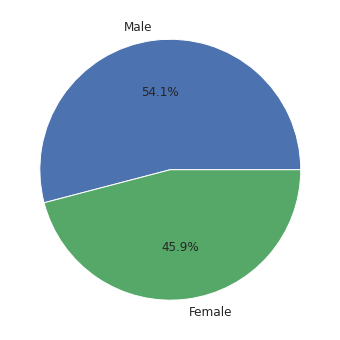

In [ ]:
# Gender-piechart
tmp = df['Gender'].value_counts(sort=True).reset_index(name="count")

plt.rcParams["figure.figsize"] = (8, 6)
plt.pie(tmp['count'],
        labels = tmp['index'],
        autopct = "%1.1f%%",
        pctdistance = 0.6,
        textprops = {"fontsize" : 12})  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


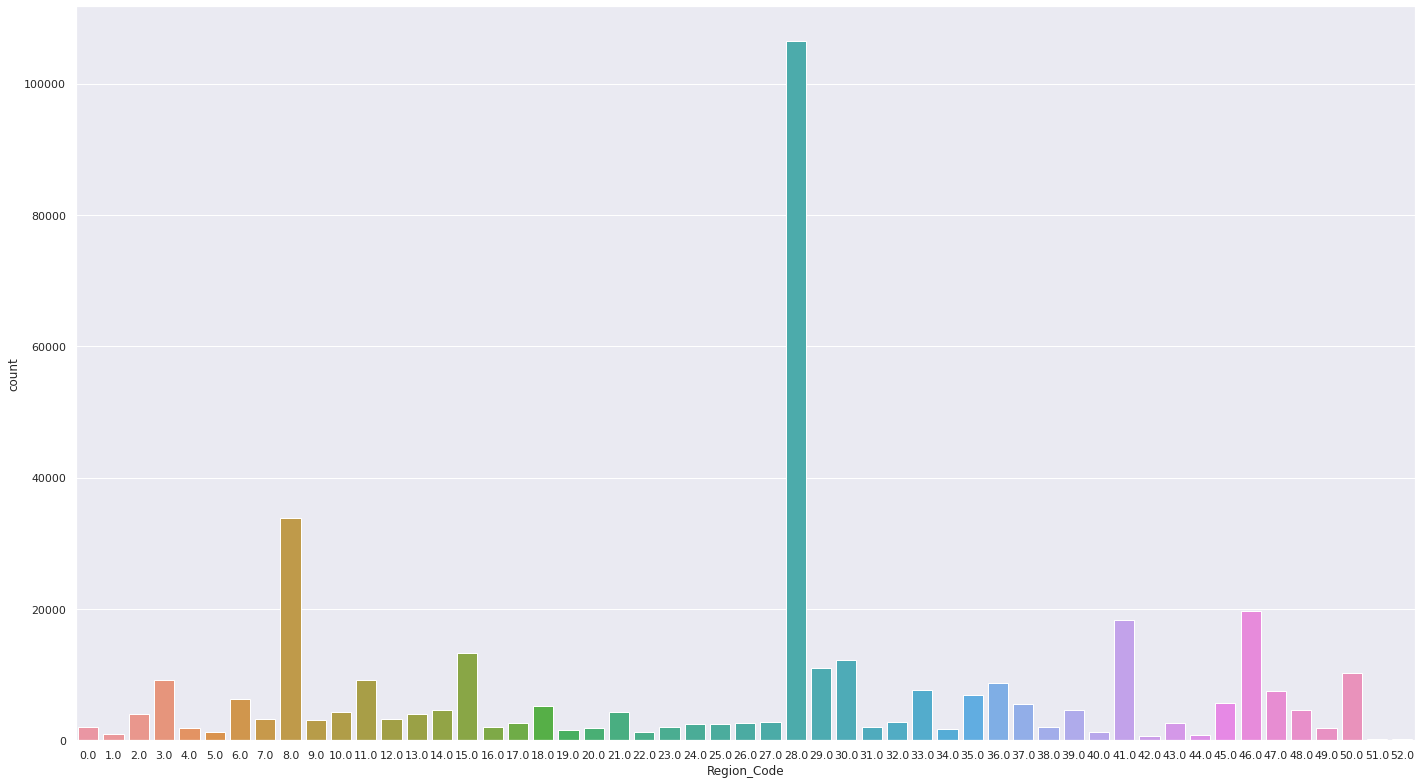

In [ ]:
# Region_Code-countplot
sns.set(rc={'figure.figsize':(24,13.5)})
sns.countplot(df['Region_Code'])

In [ ]:
df['Region_Code'].value_counts(sort=True)

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

([<matplotlib.patches.Wedge at 0x7faec46fd3d0>,
 [Text(-0.0884181610264175, 1.096440709204427, '1-2 Year'),
  Text(-0.0566067121881008, -1.0985425254104884, '< 1 Year'),
  Text(1.0904378981683174, -0.14472453226133553, '> 2 Years')],
 [Text(-0.04822808783259136, 0.59805856865696, '52.6%'),
  Text(-0.030876388466236797, -0.5992050138602664, '43.2%'),
  Text(0.5947843080918095, -0.07894065396072847, '4.2%')])

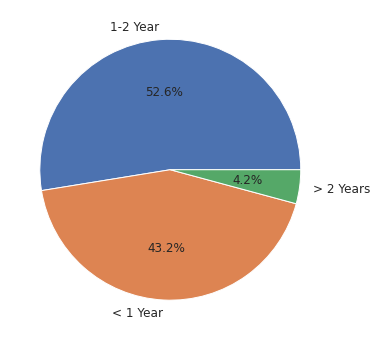

In [ ]:
# Vehicle_Age-piechart
tmp = df['Vehicle_Age'].value_counts(sort=True).reset_index(name="count")

plt.rcParams["figure.figsize"] = (8, 6)
plt.pie(tmp['count'],
        labels = tmp['index'],
        autopct = "%1.1f%%",
        pctdistance = 0.6,
        textprops = {"fontsize" : 12})  

([<matplotlib.patches.Wedge at 0x7faec4664c50>,
 [Text(0.3895885462104394, 1.0286985781372677, '152.0'),
  Text(-1.0999525218648938, 0.010220060814921085, '26.0'),
  Text(-0.22039191041746942, -1.077695414216159, '124.0'),
  Text(0.671990810621382, -0.8708779193666688, '160.0'),
  Text(0.8935563184047259, -0.6415271668752558, '156.0'),
  Text(0.9961588849445016, -0.4665484711647092, '122.0'),
  Text(1.0543794696157995, -0.3135026858779772, '157.0'),
  Text(1.083137997259417, -0.1918647411403651, '154.0'),
  Text(1.095865301968147, -0.09528504574308731, '151.0'),
  Text(1.0996297898944227, -0.028536383385912877, '163.0')],
 [Text(0.21250284338751238, 0.5611083153476005, '38.5%'),
  Text(-0.5999741028353965, 0.005574578626320592, '22.8%'),
  Text(-0.12021376931861967, -0.587833862299723, '21.1%'),
  Text(0.36654044215711745, -0.47502431965454656, '6.2%'),
  Text(0.4873943554934868, -0.3499239092046849, '3.0%'),
  Text(0.5433593917879098, -0.25448098427165955, '2.8%'),
  Text(0.5751160743

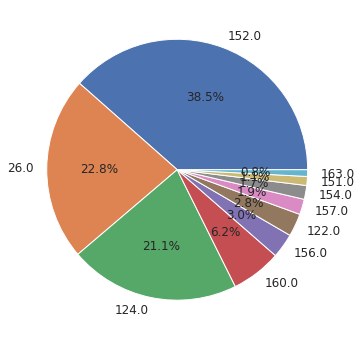

In [ ]:
#Policy_Sales_Channel-piechart
tmp = df['Policy_Sales_Channel'].value_counts(sort=True).reset_index(name="count").query("count>count.mean()")

plt.pie(tmp['count'],                           # 數值
        labels = tmp['index'],                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12})  # 文字大小

In [ ]:
df['Policy_Sales_Channel'].value_counts(sort=True).head(10)

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
122.0      9930
157.0      6684
154.0      5993
151.0      3885
163.0      2893
Name: Policy_Sales_Channel, dtype: int64

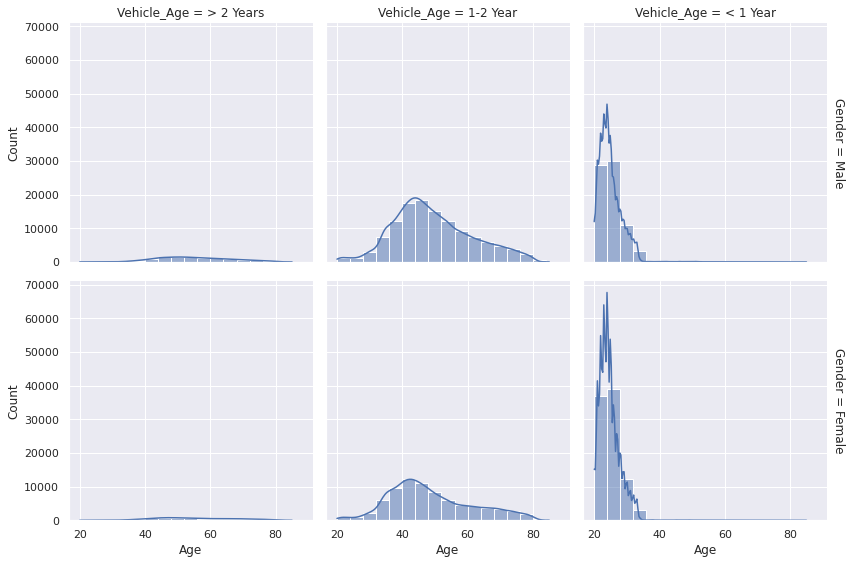

In [ ]:
#
sns.displot(
    df, x="Age", col="Vehicle_Age", row="Gender", kde=True, rug=False,
    binwidth=4, height=4, facet_kws=dict(margin_titles=True),
)

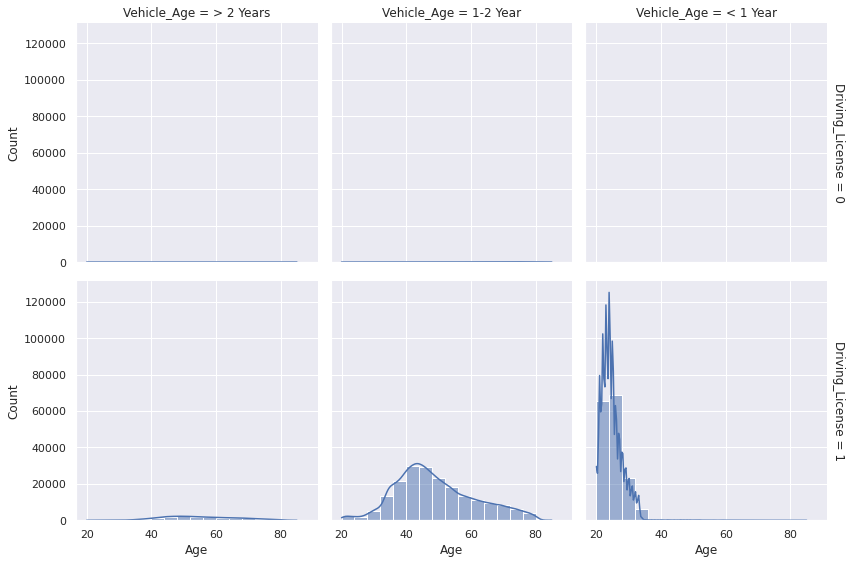

In [ ]:
sns.displot(
    df, x="Age", col="Vehicle_Age", row="Driving_License", kde=True, rug=False,
    binwidth=4, height=4, facet_kws=dict(margin_titles=True),
)

In [ ]:
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

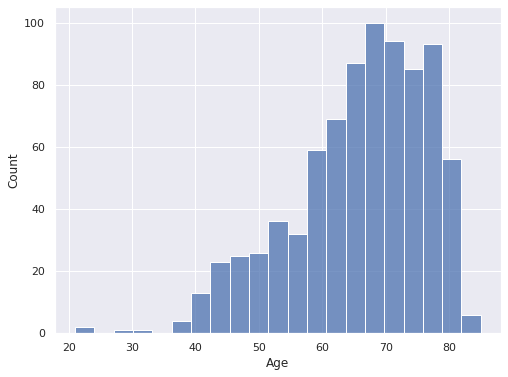

In [ ]:
sns.histplot(data=df[df['Driving_License']==0], x="Age")

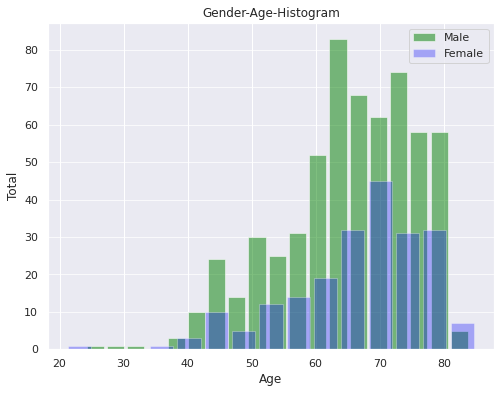

In [ ]:
plt.style.use('seaborn-deep')
n, bins, patches = plt.hist(x=df[(df['Driving_License']==0)&(df['Gender']=='Male')]['Age'], bins='auto', color='green', alpha=0.5, rwidth=0.85)
n, bins, patches = plt.hist(x=df[(df['Driving_License']==0)&(df['Gender']=='Female')]['Age'], bins='auto', color='blue', alpha=0.3, rwidth=0.85)
plt.rcParams["figure.figsize"] = (16, 12)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Total')
plt.title('Gender-Age-Histogram')
plt.legend(["Male", "Female"], loc='upper right')

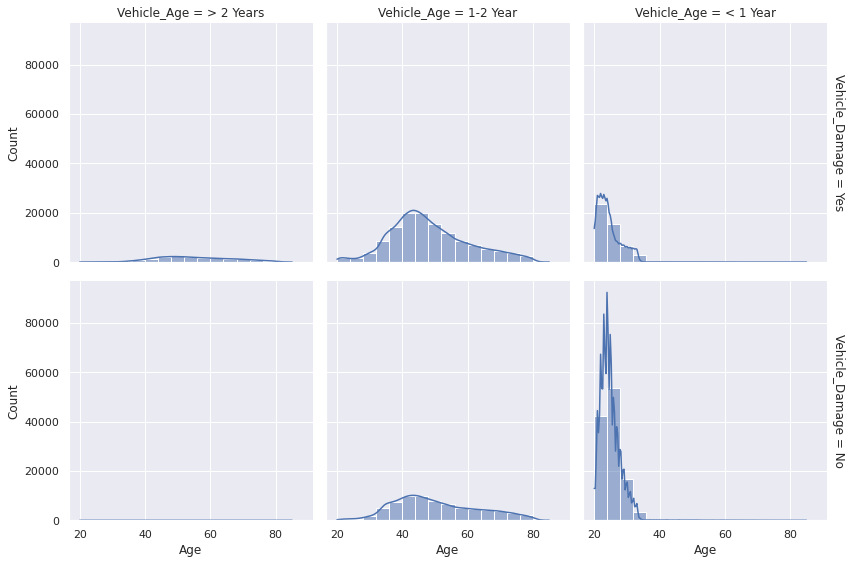

In [ ]:
sns.displot(
    df, x="Age", col="Vehicle_Age", row="Vehicle_Damage", kde=True, rug=False,
    binwidth=4, height=4, facet_kws=dict(margin_titles=True),
)

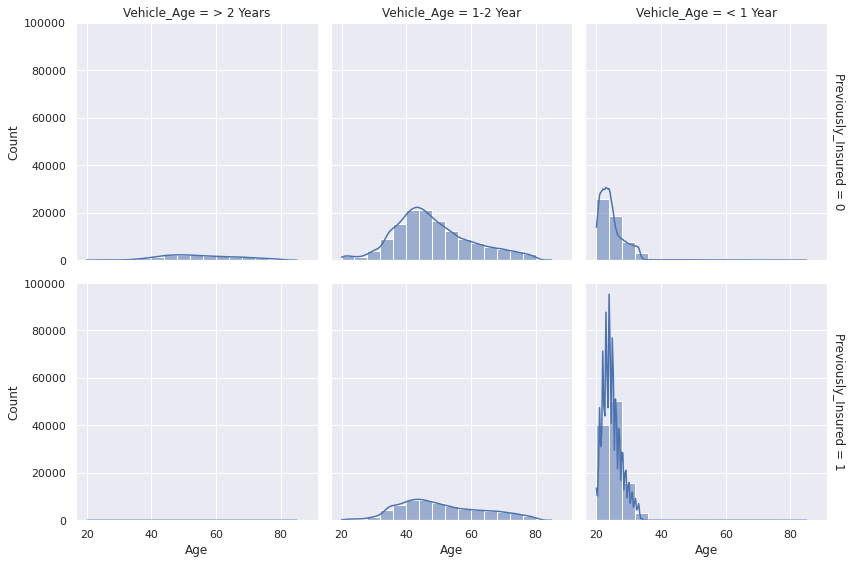

In [ ]:
sns.displot(
    df, x="Age", col="Vehicle_Age", row="Previously_Insured", kde=True, rug=False,
    binwidth=4, height=4, facet_kws=dict(margin_titles=True),
)

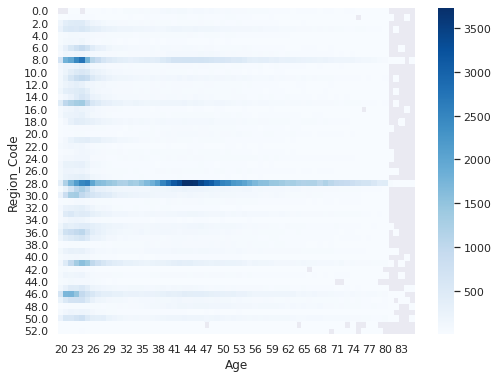

In [ ]:
tmp = df.groupby(["Region_Code","Age"]).size().reset_index(name='counts')

sns.heatmap(tmp.pivot("Region_Code", "Age", "counts"), annot=False, cmap="Blues", fmt='g')

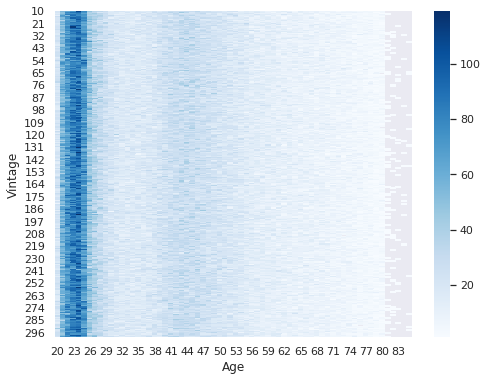

In [ ]:
tmp = df.groupby(["Vintage","Age"]).size().reset_index(name='counts')

sns.heatmap(tmp.pivot("Vintage", "Age", "counts"), annot=False, cmap="Blues", fmt='g')

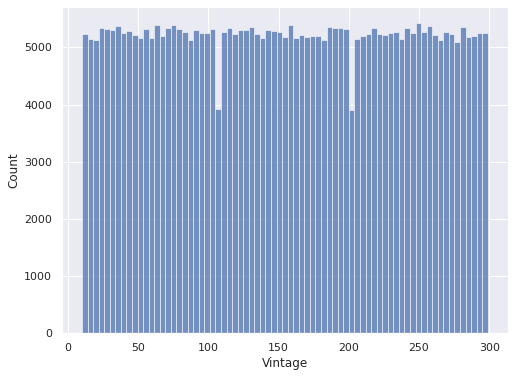

In [ ]:
sns.histplot(data=df, x="Vintage")

In [ ]:
df['Vintage'].value_counts(sort=True)

256    1418
73     1410
282    1397
158    1394
187    1392
       ... 
205    1235
89     1234
32     1230
224    1227
277    1226
Name: Vintage, Length: 290, dtype: int64

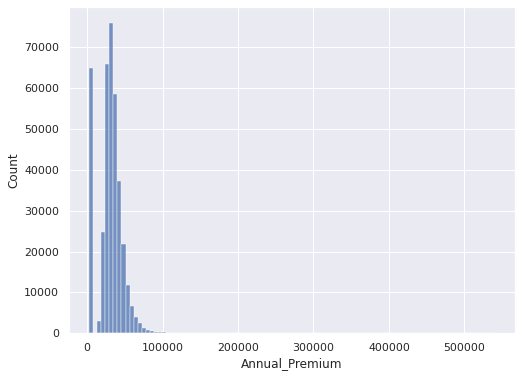

In [ ]:
sns.histplot(data=df, x="Annual_Premium", bins=100)

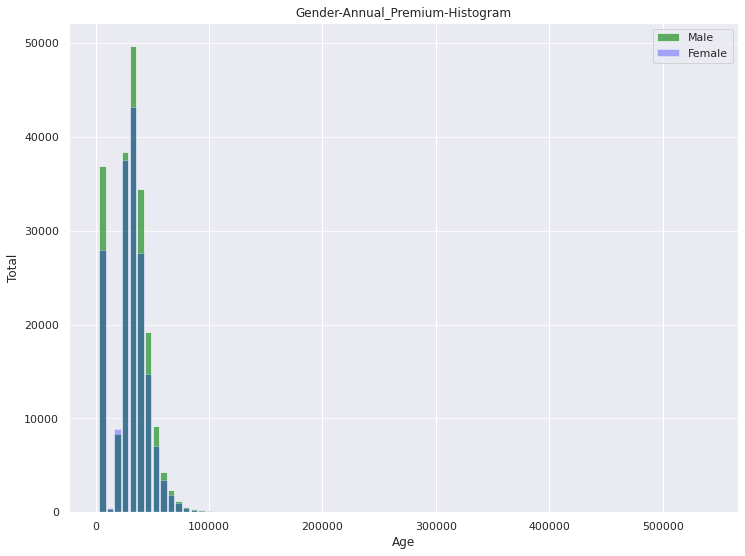

In [ ]:
# Gender-Age-Histogram
plt.style.use('seaborn-deep')
n, bins, patches = plt.hist(x=df[df['Gender']=='Male']['Annual_Premium'], bins=80, color='green', alpha=0.6, rwidth=0.85)
n, bins, patches = plt.hist(x=df[df['Gender']=='Female']['Annual_Premium'], bins=80, color='blue', alpha=0.3, rwidth=0.85)
plt.rcParams["figure.figsize"] = (12, 9)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Annual_Premium')
plt.ylabel('Total')
plt.title('Gender-Annual_Premium-Histogram')
plt.legend(["Male", "Female"], loc='upper right')

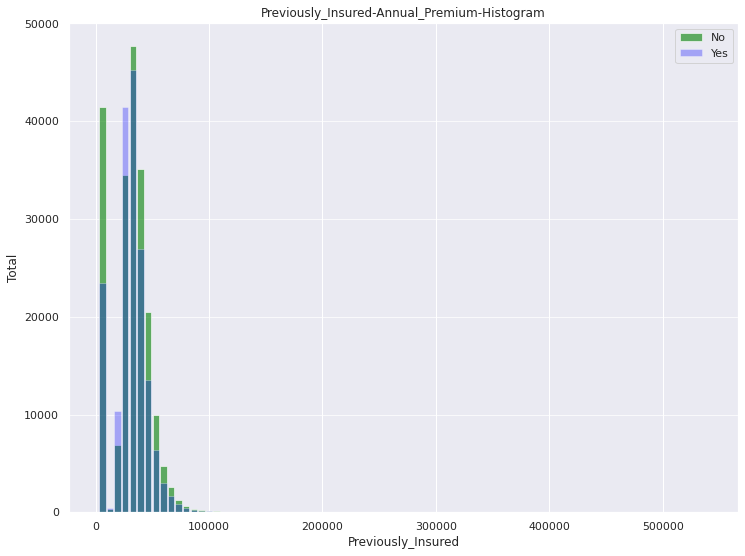

In [ ]:
# Gender-Age-Histogram
plt.style.use('seaborn-deep')
n, bins, patches = plt.hist(x=df[df['Previously_Insured']==0]['Annual_Premium'], bins=80, color='green', alpha=0.6, rwidth=0.85)
n, bins, patches = plt.hist(x=df[df['Previously_Insured']==1]['Annual_Premium'], bins=80, color='blue', alpha=0.3, rwidth=0.85)
plt.rcParams["figure.figsize"] = (12, 9)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Previously_Insured')
plt.ylabel('Total')
plt.title('Previously_Insured-Annual_Premium-Histogram')
plt.legend(["No", "Yes"], loc='upper right')

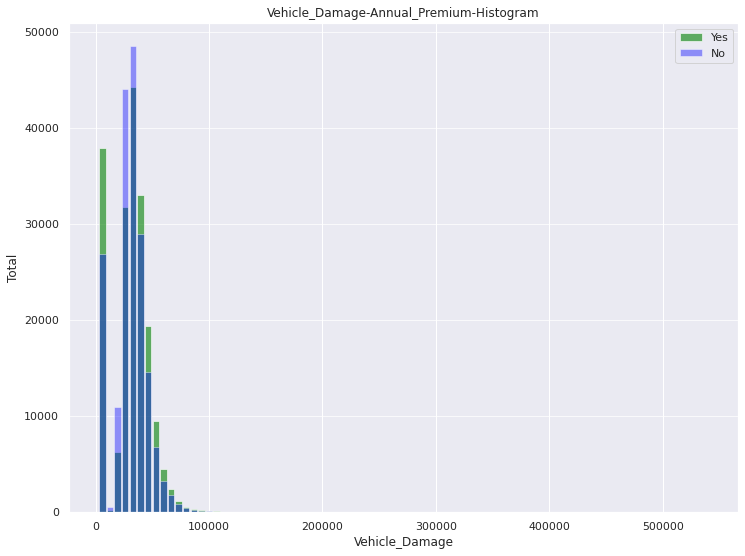

In [ ]:
# Gender-Age-Histogram
plt.style.use('seaborn-deep')
n, bins, patches = plt.hist(x=df[df['Vehicle_Damage']=='Yes']['Annual_Premium'], bins=80, color='green', alpha=0.6, rwidth=0.85)
n, bins, patches = plt.hist(x=df[df['Vehicle_Damage']=='No']['Annual_Premium'], bins=80, color='blue', alpha=0.4, rwidth=0.85)

plt.rcParams["figure.figsize"] = (12, 9)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Vehicle_Damage')
plt.ylabel('Total')
plt.title('Vehicle_Damage-Annual_Premium-Histogram')
plt.legend(["Yes", "No"], loc='upper right')

In [ ]:
#資料嚴重不平衡，須將資料變成盡量1:1
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

#getdummy

In [ ]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(df[f], df[t])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)